In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
new_model = tf.keras.models.load_model('C:/Users/keyah/OneDrive/Desktop/5th sem/SGP/final_model.h5')

In [3]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
frame = cv2.imread("78.jpg")

In [5]:
frame.shape

(48, 48, 3)

In [6]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [7]:
gray.shape

(48, 48)

In [8]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0),2)
    facess= faceCascade.detectMultiScale(roi_gray)
    if len(facess)  == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex: ex+ew]
            

In [10]:
if len(facess)  == 0:
        print("Face not detected")
else:
    for(ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey:ey+eh, ex: ex+ew]

NameError: name 'facess' is not defined

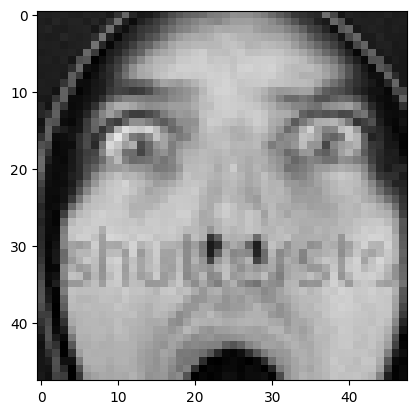

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

NameError: name 'face_roi' is not defined

In [15]:
path="C:/Users/keyah/Downloads/haarcascade_frontalface_default"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
output = []

rectangle_bgr =(255,255,255)
img = np.zeros((500,500))

text="some text in  a box"
(text_width,text_height )= cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=(text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height - 2)
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap =cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

i=0

while (i <=50):
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0),2)
        facess= faceCascade.detectMultiScale(roi_gray)
        if len(facess)  == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex: ex+ew]
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Angry")
        
    elif(np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Disgust")
    
    elif(np.argmax(Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Fear")
        
    elif(np.argmax(Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Happy")

    elif(np.argmax(Predictions)==4):
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Neutral")
        
    elif(np.argmax(Predictions)==5):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Sad")
        
    else :
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1) , (x1 + w1, y1 + h1),(0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255),2)
        cv2.putText(frame,status,(100,150),font, 3 ,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        output.append("Surprise")
                      
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    i = i +1

print(output)           
cap.release()
cv2.destroyAllWindows()

Face not detected
1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
['Sad', 'Sad', 'Neutral', 'Neutral', 'Sad', 'Fear', 'Neutral', 'Sad', 'Sad', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral']


In [17]:
import statistics as st
final_output = st.mode(output)
final_output

'Neutral'

In [28]:
i=0
GR_dict={0:(0,255,0),1:(0,0,255)}

model = tf.keras.models.load_model('final_model.h5')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

output=[]
cap = cv2.VideoCapture(0)

while (i<=200):
    ret, img = cap.read()
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img,1.05,5)

    for x,y,w,h in faces:

        face_img = img[y:y+h,x:x+w] 

        resized = cv2.resize(face_img,(224,224))
        reshaped=resized.reshape(1, 224,224,3)/255
        predictions = model.predict(reshaped)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'surprise')
        predicted_emotion = emotions[max_index]
        output.append(predicted_emotion)
            
            
            
        cv2.rectangle(img,(x,y),(x+w,y+h),GR_dict[1],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),GR_dict[1],-1)
        cv2.putText(img, predicted_emotion, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    i = i+1

    cv2.imshow('LIVE', img)
    key = cv2.waitKey(1)
    if key == 27: 
        cap.release()
        cv2.destroyAllWindows()
        break
print(output)
cap.release()
cv2.destroyAllWindows()
final_output1 = st.mode(output)

1/1 [==============================] - 0s 63ms/step
['neutral', 'fear', 'neutral', 'neutral', 'fear', 'neutral', 'neutral', 'fear', 'happy', 'fear', 'happy', 'happy', 'happy', 'fear', 'fear', 'happy', 'happy', 'neutral', 'fear', 'neutral', 'neutral', 'fear', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'sad', 'happy', 'sad', 'happy', 'happy', 'fear', 'happy', 'fear', 'fear', 'happy', 'fear', 'fear', 'fear', 'happy', 'fear', 'sad', 'sad', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'happy', 'sad', 'happy', 'neutral', 'surprise', 'surprise', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'neutral', 'sad', 'happy', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'fear', 'sad', 'neut